In [1]:
from math import isnan

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Constants

In [2]:
ch_results_fname = 'data_grid.csv'
bch_results_fname = 'data_bcc.csv'
NUM_BOX_SIZES = 7
BOX_SIZES = [10, 15, 20, 25, 30, 35, 40]

NUM_ZONE_COUNTS = 3
ZONE_COUNTS = [2, 8, 25]

CUBE_SIZES = [box_size**3 for box_size in BOX_SIZES]
GEOGRAPH_STATUS_TO_INDEX = {'fail_1': 0, 'fail_2': 1, 'fail_3': 2, 'fail_4': 3, 'fail_5': 4, 'success': 5}
BFS_STATUS_TO_INDEX = {'failure': 0, 'success': 1}

# Plotting parameters
MARKER_SIZE = 8
LOG_X = False
LOG_Y = False
Y_MAX = 800
point_markers = ["s", "P", "^", "x", "+", "D", ">", "*", "v", "o"]
plt.rcParams['font.size'] = '18'

## Seaborn setup

In [3]:
sns.set_context("paper", font_scale=1.5, \
                rc={"font.family": "sans-serif", "font.sans-serif": \
                    ["Helvetica", "DejaVu Sans", "Arial", "sans-serif"]})
sns.set_palette(sns.xkcd_palette(colors=["navy", "grey"]))

# CH Results

## Load data

In [4]:
ch_df = pd.read_csv(ch_results_fname)
print(len(ch_df))
ch_df["number of cells"] = ch_df["number of cells"] / 1000.
ch_df["number of cells"] = ch_df["number of cells"].round(decimals=1)
unique_cell_counts_ch = np.unique(ch_df["number of cells"])
ch_df.head(12)

168


,number of zones,number of cells,flip type,status,average microseconds,number of samples
0,8,1.0,geograph3d,fail_1,114.4570,3951
1,8,1.0,geograph3d,fail_2,NaN,0
2,8,1.0,geograph3d,fail_3,153.3990,213
3,8,1.0,geograph3d,fail_4,155.9430,297
4,8,1.0,geograph3d,fail_5,160.4730,419
5,8,1.0,geograph3d,success,211.3520,5120
6,8,1.0,bfs,failure,11.6529,1550
7,8,1.0,bfs,success,6.7987,8450
8,8,3.4,geograph3d,fail_1,121.1170,13081
9,8,3.4,geograph3d,fail_2,NaN,0


In [5]:
df2 = ch_df.copy()
df2["flip result"] = df2.apply(\
    lambda row: "success" if row["status"] == "success" else "failure", axis=1)
df2["total microseconds"] = df2["average microseconds"] * df2["number of samples"]
df2.head(12)

,number of zones,number of cells,flip type,status,average microseconds,number of samples,flip result,total microseconds
0,8,1.0,geograph3d,fail_1,114.4570,3951,failure,452219.607
1,8,1.0,geograph3d,fail_2,NaN,0,failure,NaN
2,8,1.0,geograph3d,fail_3,153.3990,213,failure,32673.987
3,8,1.0,geograph3d,fail_4,155.9430,297,failure,46315.071
4,8,1.0,geograph3d,fail_5,160.4730,419,failure,67238.187
5,8,1.0,geograph3d,success,211.3520,5120,success,1082122.240
6,8,1.0,bfs,failure,11.6529,1550,failure,18061.995
7,8,1.0,bfs,success,6.7987,8450,success,57449.015
8,8,3.4,geograph3d,fail_1,121.1170,13081,failure,1584331.477
9,8,3.4,geograph3d,fail_2,NaN,0,failure,NaN


In [6]:
df2.rename(columns={"average microseconds": "CPU Time (microseconds)", \
                    "flip type": "Flip Type", \
                    "status": "status code", \
                    "flip result": "Status", \
                    "number of cells": "Number of Cells (thousands)", \
                    "number of zones": "Number of Zones"}, \
           inplace=True)
df3 = df2.groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
df3["CPU Time (microseconds)"] = df3["total microseconds"] / df3["number of samples"]
df3.drop(columns=["total microseconds"], inplace=True)
df3.head(12)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status  Number of Zones                            
1.0                         bfs        failure 2                              18.069300   
                                               8                              11.652900   
                                               25                              6.130020   
                                       success 2                               7.210390   
                                               8                               6.798700   
                                               25                              5.067720   
                            geograph3d failure 2                             122.748206   
                                               8                             122.632552   
                                               25                            111.186813   
                                       success 2                             223.971000   
                                               8                             211.352000   
                                               25                            184.068000   

                                                                number of samples  
Number of Cells (thousands) Flip Type  Status  Number of Zones                     
1.0                         bfs        failure 2                              822  
                                               8                             1550  
                                               25                            2115  
                                       success 2                             9178  
                                               8                             8450  
                                               25                            7885  
                            geograph3d failure 2                             4089  
                                               8                             4880  
                                               25                            5125  
                                       success 2                             5911  
                                               8                             5120  
                                               25                            4875

In [7]:
df4 = df2.groupby(["Number of Cells (thousands)", "Flip Type", "Number of Zones"]).sum()
df4["CPU Time (microseconds)"] = df4["total microseconds"] / df4["number of samples"]
df4["Status"] = "combined"
df4.drop(columns=["total microseconds"], inplace=True)
df4 = df4.groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
df4.head(12)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status   Number of Zones                            
1.0                         bfs        combined 2                               8.102992   
                                                8                               7.551101   
                                                25                              5.292396   
                            geograph3d combined 2                             182.581000   
                                                8                             168.056909   
                                                25                            146.716392   
3.4                         bfs        combined 2                              24.686315   
                                                8                              17.328614   
                                                25                             14.621460   
                            geograph3d combined 2                             194.663981   
                                                8                             177.989988   
                                                25                            156.367163   

                                                                 number of samples  
Number of Cells (thousands) Flip Type  Status   Number of Zones                     
1.0                         bfs        combined 2                            10000  
                                                8                            10000  
                                                25                           10000  
                            geograph3d combined 2                            10000  
                                                8                            10000  
                                                25                           10000  
3.4                         bfs        combined 2                            33750  
                                                8                            33750  
                                                25                           33750  
                            geograph3d combined 2                            33750  
                                                8                            33750  
                                                25                           33750

In [8]:
df5 = pd.concat([df3, df4]).groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
df5.head(12)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status   Number of Zones                            
1.0                         bfs        combined 2                               8.102992   
                                                8                               7.551101   
                                                25                              5.292396   
                                       failure  2                              18.069300   
                                                8                              11.652900   
                                                25                              6.130020   
                                       success  2                               7.210390   
                                                8                               6.798700   
                                                25                              5.067720   
                            geograph3d combined 2                             182.581000   
                                                8                             168.056909   
                                                25                            146.716392   

                                                                 number of samples  
Number of Cells (thousands) Flip Type  Status   Number of Zones                     
1.0                         bfs        combined 2                            10000  
                                                8                            10000  
                                                25                           10000  
                                       failure  2                              822  
                                                8                             1550  
                                                25                            2115  
                                       success  2                             9178  
                                                8                             8450  
                                                25                            7885  
                            geograph3d combined 2                            10000  
                                                8                            10000  
                                                25                           10000

## Plot execution time vs. number of cells

In [9]:
"""
df: DataFrame with all experimental results for one honeycomb type
number_of_zones: value to filter on "Number of Zones" column
honeycomb_type: "ch" or "bch"
"""
def plot_time_vs_cellcount(df, number_of_zones, honeycomb_type, showtitle=False):
    dfk = df.reset_index()
    dfk = dfk[dfk["Number of Zones"] == number_of_zones]
    g = sns.relplot(x="Number of Cells (thousands)", y="CPU Time (microseconds)", hue="Flip Type", hue_order=["geograph3d", "bfs"], style="Status", style_order=["success", "failure", "combined"], kind="line", markers=True, markersize=MARKER_SIZE, data=dfk);
    fig = plt.gcf()
    axes = np.array(g.axes.flat)
    for ax in axes:
        if LOG_X: ax.set(xscale="log")
        unique_cell_counts = unique_cell_counts_ch if honeycomb_type == "ch" else unique_cell_counts_bch
        ax.set_xticks([unique_cell_counts[0], unique_cell_counts[2], unique_cell_counts[4], unique_cell_counts[6]])
        ax.set_xticklabels(ax.get_xticks(), rotation=45)

        if LOG_Y: ax.set(yscale="log")
        ax.set_ylim([0, Y_MAX])

    if showtitle:
        plt.title("{} Results, K={}".format(honeycomb_type.upper(), number_of_zones))
    plt.savefig("plot_{}_K{}.pdf".format(honeycomb_type, number_of_zones), bbox_inches="tight")
    plt.savefig("plot_{}_K{}.png".format(honeycomb_type, number_of_zones), bbox_inches="tight", dpi=600)

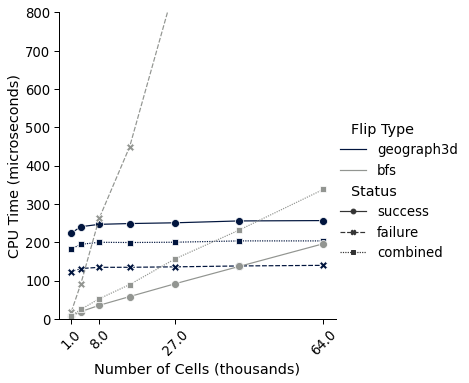

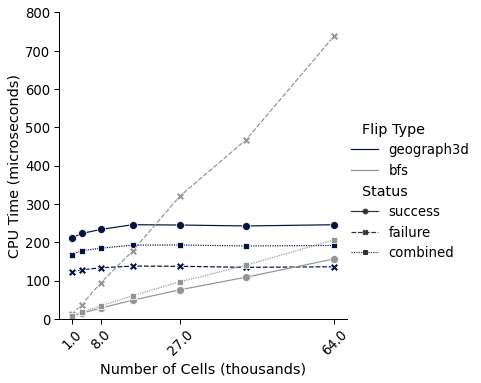

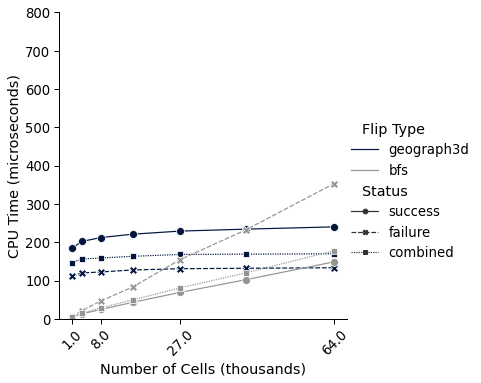

In [10]:
for k in ZONE_COUNTS:
    plot_time_vs_cellcount(df5, k, "ch")

# BCH Results

## Load data

In [11]:
bch_df = pd.read_csv(bch_results_fname)
print(len(bch_df))
bch_df["number of cells"] = bch_df["number of cells"] / 1000.
bch_df["number of cells"] = bch_df["number of cells"].round(decimals=1)
unique_cell_counts_bch = np.unique(bch_df["number of cells"])
bch_df.head()

168


,number of zones,number of cells,flip type,status,average microseconds,number of samples
0,8,1.7,geograph3d,fail_1,209.621,9954
1,8,1.7,geograph3d,fail_2,NaN,0
2,8,1.7,geograph3d,fail_3,292.862,4213
3,8,1.7,geograph3d,fail_4,271.728,169
4,8,1.7,geograph3d,fail_5,214.312,16


In [12]:
bch_df2 = bch_df.copy()
bch_df2["flip result"] = bch_df2.apply(\
    lambda row: "success" if row["status"] == "success" else "failure", axis=1)
bch_df2["total microseconds"] = bch_df2["average microseconds"] * bch_df2["number of samples"]
bch_df2.head()

,number of zones,number of cells,flip type,status,average microseconds,number of samples,flip result,total microseconds
0,8,1.7,geograph3d,fail_1,209.621,9954,failure,2086567.434
1,8,1.7,geograph3d,fail_2,NaN,0,failure,NaN
2,8,1.7,geograph3d,fail_3,292.862,4213,failure,1233827.606
3,8,1.7,geograph3d,fail_4,271.728,169,failure,45922.032
4,8,1.7,geograph3d,fail_5,214.312,16,failure,3428.992


In [13]:
bch_df2.rename(columns={"average microseconds": "CPU Time (microseconds)", \
                    "flip type": "Flip Type", \
                    "status": "status code", \
                    "flip result": "Status", \
                    "number of cells": "Number of Cells (thousands)",\
                    "number of zones": "Number of Zones"}, \
           inplace=True)
bch_df3 = bch_df2.groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
bch_df3["CPU Time (microseconds)"] = bch_df3["total microseconds"] / bch_df3["number of samples"]
bch_df3.drop(columns=["total microseconds"], inplace=True)
bch_df3.head(100)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status  Number of Zones                            
1.7                         bfs        failure 2                              84.282400   
                                               8                              37.385400   
                                               25                             21.469000   
                                       success 2                              15.299900   
                                               8                              12.286500   
...                                                                                 ...   
123.3                       geograph3d failure 8                             278.140039   
                                               25                            277.170305   
                                       success 2                             482.808000   
                                               8                             479.715000   
                                               25                            471.841000   

                                                                number of samples  
Number of Cells (thousands) Flip Type  Status  Number of Zones                     
1.7                         bfs        failure 2                              393  
                                               8                              659  
                                               25                            1727  
                                       success 2                            16897  
                                               8                            16631  
...                                                                           ...  
123.3                       geograph3d failure 8                          1180951  
                                               25                         1176575  
                                       success 2                            48738  
                                               8                            52239  
                                               25                           56615  

[84 rows x 2 columns]

In [14]:
bch_df4 = bch_df2.groupby(["Number of Cells (thousands)", "Flip Type", "Number of Zones"]).sum()
bch_df4["CPU Time (microseconds)"] = bch_df4["total microseconds"] / bch_df4["number of samples"]
bch_df4["Status"] = "combined"
bch_df4.drop(columns=["total microseconds"], inplace=True)
bch_df4 = bch_df4.groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
bch_df4.head(100)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status   Number of Zones                            
1.7                         bfs        combined 2                              16.867865   
                                                8                              13.243132   
                                                25                             13.788943   
                            geograph3d combined 2                             304.843778   
                                                8                             258.474224   
                                                25                            261.168733   
6.1                         bfs        combined 2                              34.225410   
                                                8                              38.587116   
                                                25                             35.094105   
                            geograph3d combined 2                             264.405381   
                                                8                             265.332258   
                                                25                            275.240103   
14.9                        bfs        combined 2                              71.289820   
                                                8                              81.434485   
                                                25                             78.137964   
                            geograph3d combined 2                             273.231897   
                                                8                             272.828192   
                                                25                            270.387865   
29.4                        bfs        combined 2                             135.765118   
                                                8                             156.572658   
                                                25                            145.712602   
                            geograph3d combined 2                             277.006504   
                                                8                             291.247262   
                                                25                            275.802009   
51.4                        bfs        combined 2                             220.979028   
                                                8                             247.914901   
                                                25                            239.414301   
                            geograph3d combined 2                             282.182169   
                                                8                             278.945089   
                                                25                            279.455351   
82.2                        bfs        combined 2                             342.032913   
                                                8                             372.489183   
                                                25                            369.737404   
                            geograph3d combined 2                             285.291281   
                                                8                             279.947998   
                                                25                            283.244354   
123.3                       bfs        combined 2                             497.203463   
                                                8                             557.494502   
                                                25                            558.049508   
                            geograph3d combined 2                             289.710527   
                                                8                             286.678930   
                                                25                            286.107518   

                

In [15]:
bch_df5 = pd.concat([bch_df3, bch_df4]).groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
bch_df5.head(100)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status   Number of Zones                            
1.7                         bfs        combined 2                              16.867865   
                                                8                              13.243132   
                                                25                             13.788943   
                                       failure  2                              84.282400   
                                                8                              37.385400   
...                                                                                  ...   
82.2                        bfs        failure  25                           2227.100000   
                                       success  2                             331.590000   
                                                8                             353.929000   
                                                25                            356.595000   
                            geograph3d combined 2                             285.291281   

                                                                 number of samples  
Number of Cells (thousands) Flip Type  Status   Number of Zones                     
1.7                         bfs        combined 2                            17290  
                                                8                            17290  
                                                25                           17290  
                                       failure  2                              393  
                                                8                              659  
...                                                                            ...  
82.2                        bfs        failure  25                            5774  
                                       success  2                           820054  
                                                8                           818963  
                                                25                          816016  
                            geograph3d combined 2                           821790  

[100 rows x 2 columns]

## Plot CPU Time vs. Number of Cells for BCH

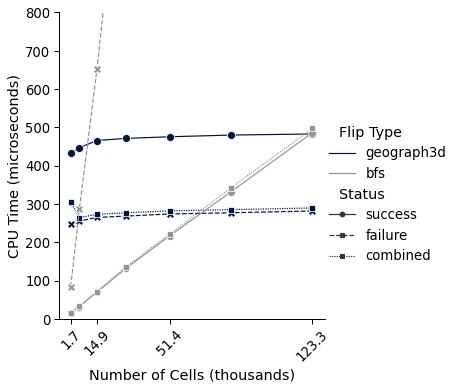

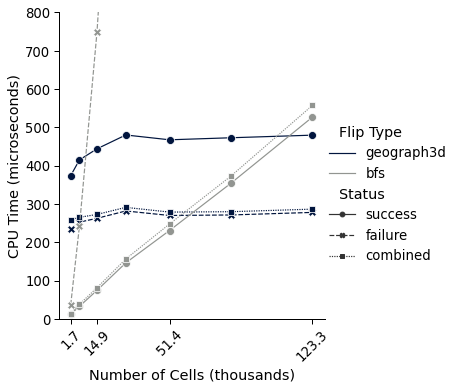

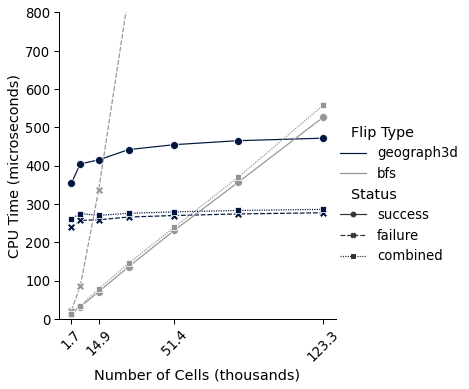

In [16]:
for k in ZONE_COUNTS:
    plot_time_vs_cellcount(bch_df5, k, "bch")

## Plot All "Combined" Results Together

In [17]:
df5["Honeycomb Type"] = "ch"
bch_df5["Honeycomb Type"] = "bch"

df = pd.concat([df5, bch_df5]).reset_index()
df = df[df["Status"] == "combined"].drop(columns=["Status", "number of samples"])
df = df.groupby(["Number of Cells (thousands)", "Flip Type", "Number of Zones", "Honeycomb Type"]).sum()
df.head(12)

CPU Time (microseconds)
Number of Cells (thousands) Flip Type  Number of Zones Honeycomb Type                         
1.0                         bfs        2               ch                             8.102992
                                       8               ch                             7.551101
                                       25              ch                             5.292396
                            geograph3d 2               ch                           182.581000
                                       8               ch                           168.056909
                                       25              ch                           146.716392
1.7                         bfs        2               bch                           16.867865
                                       8               bch                           13.243132
                                       25              bch                           13.788943
                            geograph3d 2               bch                          304.843778
                                       8               bch                          258.474224
                                       25              bch                          261.168733

In [18]:
def plot_combined_all_zone_counts(df, honeycomb_type, showtitle=False):
    dfh = df.reset_index()
    dfh = dfh[dfh["Honeycomb Type"] == honeycomb_type]

    g = sns.relplot(x="Number of Cells (thousands)", y="CPU Time (microseconds)", hue="Flip Type", hue_order=["geograph3d", "bfs"], style="Number of Zones", style_order=[2, 8, 25], kind="line", markers=True, markersize=MARKER_SIZE, data=dfh);
    fig = plt.gcf()
    axes = np.array(g.axes.flat)
    for ax in axes:
        if LOG_X: ax.set(xscale="log")
        unique_cell_counts = np.unique(dfh["Number of Cells (thousands)"])
        ax.set_xticks([unique_cell_counts[0], unique_cell_counts[2], unique_cell_counts[4], unique_cell_counts[-1]])
        ax.set_xticklabels(ax.get_xticks(), rotation=45)

        if LOG_Y: ax.set(yscale="log")
        ax.set_ylim([0, Y_MAX])

    if showtitle:
        plt.title("Combined Results: {}, All Zone Counts".format(honeycomb_type.upper()))
    plt.savefig("plot_combined_{}.pdf".format(honeycomb_type), bbox_inches="tight")
    plt.savefig("plot_combined_{}.png".format(honeycomb_type), bbox_inches="tight", dpi=600)

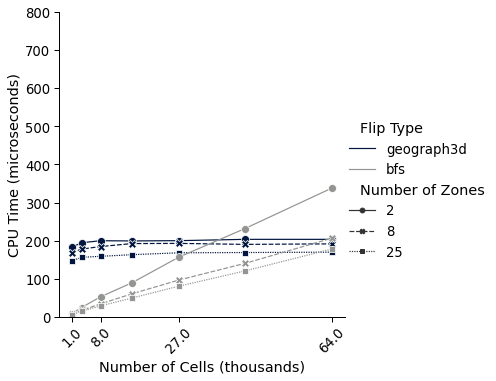

In [19]:
plot_combined_all_zone_counts(df, "ch")

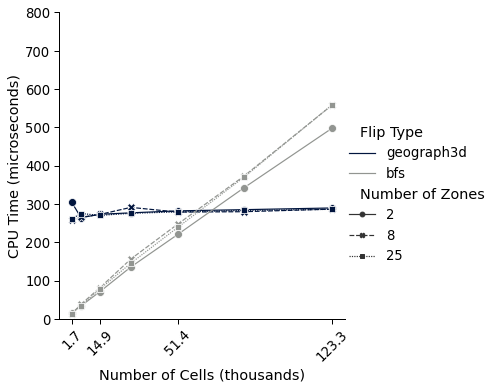

In [20]:
plot_combined_all_zone_counts(df, "bch")

# Generate Table(s) for Paper

## Reload Results DataFrames

In [80]:
colname_mapping = {\
    'number of zones': 'K', \
    'number of cells': 'N', \
    'status': 'Status', \
    'average microseconds': 'Avg. Flip Time ($\mu$s)', 
    'number of samples': 'Freq.'}

In [81]:
df_ch = pd.read_csv(ch_results_fname)
df_ch = df_ch.rename(columns=colname_mapping)
df_ch.head()

,K,N,flip type,Status,Avg. Flip Time ($\mu$s),Freq.
0,8,1000,geograph3d,fail_1,114.457,3951
1,8,1000,geograph3d,fail_2,NaN,0
2,8,1000,geograph3d,fail_3,153.399,213
3,8,1000,geograph3d,fail_4,155.943,297
4,8,1000,geograph3d,fail_5,160.473,419


In [82]:
df_bch = pd.read_csv(bch_results_fname)
df_bch = df_bch.rename(columns=colname_mapping)
df_bch.head()

,K,N,flip type,Status,Avg. Flip Time ($\mu$s),Freq.
0,8,1729,geograph3d,fail_1,209.621,9954
1,8,1729,geograph3d,fail_2,NaN,0
2,8,1729,geograph3d,fail_3,292.862,4213
3,8,1729,geograph3d,fail_4,271.728,169
4,8,1729,geograph3d,fail_5,214.312,16


## Split CH and BCH, BFS and 3DGG

In [83]:
df_ch_BFS = df_ch[df_ch['flip type'] == 'bfs']
df_ch_BFS = df_ch_BFS.drop(columns=['flip type'])
df_ch_3DGG = df_ch[df_ch['flip type'] == 'geograph3d']
df_ch_3DGG = df_ch_3DGG.drop(columns=['flip type'])

In [84]:
df_ch_BFS = df_ch_BFS.groupby(['K', 'N', 'Status']).sum()
df_ch_BFS.head()

Avg. Flip Time ($\mu$s)  Freq.
K N    Status                                 
2 1000 failure                 18.06930    822
       success                  7.21039   9178
  3375 failure                 91.56090   2678
       success                 18.92260  31072
  8000 failure                262.59600   6078

In [85]:
print(df_ch_BFS.to_latex())

\begin{tabular}{lllrr}
\toprule
   &       &         &  Avg. Flip Time (\$\textbackslash mu\$s) &   Freq. \\
K & N & Status &                          &         \\
\midrule
2  & 1000  & failure &                 18.06930 &     822 \\
   &       & success &                  7.21039 &    9178 \\
   & 3375  & failure &                 91.56090 &    2678 \\
   &       & success &                 18.92260 &   31072 \\
   & 8000  & failure &                262.59600 &    6078 \\
   &       & success &                 35.48560 &   73922 \\
   & 15625 & failure &                449.23000 &   12504 \\
   &       & success &                 58.26410 &  143746 \\
   & 27000 & failure &                872.24900 &   22516 \\
   &       & success &                 91.91350 &  247484 \\
   & 42875 & failure &               1291.07000 &   35174 \\
   &       & success &                136.79100 &  393576 \\
   & 64000 & failure &               2045.82000 &   49055 \\
   &       & success &            

In [86]:
df_ch_3DGG = df_ch_3DGG.groupby(['K', 'N', 'Status']).sum()
df_ch_3DGG.head()

Avg. Flip Time ($\mu$s)  Freq.
K N    Status                                
2 1000 fail_1                  117.620   3436
       fail_2                    0.000      0
       fail_3                  147.626    564
       fail_4                  163.079     89
       fail_5                    0.000      0

In [87]:
print(df_ch_3DGG.to_latex())

\begin{tabular}{lllrr}
\toprule
   &       &         &  Avg. Flip Time (\$\textbackslash mu\$s) &   Freq. \\
K & N & Status &                          &         \\
\midrule
2  & 1000  & fail\_1 &                  117.620 &    3436 \\
   &       & fail\_2 &                    0.000 &       0 \\
   &       & fail\_3 &                  147.626 &     564 \\
   &       & fail\_4 &                  163.079 &      89 \\
   &       & fail\_5 &                    0.000 &       0 \\
   &       & success &                  223.971 &    5911 \\
   & 3375  & fail\_1 &                  127.247 &   12283 \\
   &       & fail\_2 &                    0.000 &       0 \\
   &       & fail\_3 &                  156.494 &    1742 \\
   &       & fail\_4 &                  174.459 &     185 \\
   &       & fail\_5 &                    0.000 &       0 \\
   &       & success &                  240.637 &   19540 \\
   & 8000  & fail\_1 &                  130.901 &   29213 \\
   &       & fail\_2 &            

In [88]:
df_bch_BFS = df_bch[df_bch['flip type'] == 'bfs']
df_bch_BFS = df_bch_BFS.drop(columns=['flip type'])
df_bch_3DGG = df_bch[df_bch['flip type'] == 'geograph3d']
df_bch_3DGG = df_bch_3DGG.drop(columns=['flip type'])

In [89]:
df_bch_BFS = df_bch_BFS.groupby(['K', 'N', 'Status']).sum()
df_bch_BFS.head()

Avg. Flip Time ($\mu$s)  Freq.
K N     Status                                 
2 1729  failure                  84.2824    393
        success                  15.2999  16897
  6119  failure                 288.2300    391
        success                  32.5919  60799
  14859 failure                 651.9830    234

In [90]:
print(df_bch_BFS.to_latex())

\begin{tabular}{lllrr}
\toprule
   &        &         &  Avg. Flip Time (\$\textbackslash mu\$s) &    Freq. \\
K & N & Status &                          &          \\
\midrule
2  & 1729   & failure &                  84.2824 &      393 \\
   &        & success &                  15.2999 &    16897 \\
   & 6119   & failure &                 288.2300 &      391 \\
   &        & success &                  32.5919 &    60799 \\
   & 14859  & failure &                 651.9830 &      234 \\
   &        & success &                  70.3739 &   148356 \\
   & 29449  & failure &                1353.0400 &      872 \\
   &        & success &                 132.1500 &   293618 \\
   & 51389  & failure &                3399.2600 &      699 \\
   &        & success &                 216.6500 &   513191 \\
   & 82179  & failure &                5275.0700 &     1736 \\
   &        & success &                 331.5900 &   820054 \\
   & 123319 & failure &               11286.9000 &     1226 \\
   & 

In [91]:
df_bch_3DGG = df_bch_3DGG.groupby(['K', 'N', 'Status']).sum()
df_bch_3DGG.head()

Avg. Flip Time ($\mu$s)  Freq.
K N    Status                                
2 1729 fail_1                  222.769   7720
       fail_2                    0.000      0
       fail_3                  292.594   4174
       fail_4                  262.816     38
       fail_5                    0.000      0

In [92]:
print(df_bch_3DGG.to_latex())

\begin{tabular}{lllrr}
\toprule
   &        &         &  Avg. Flip Time (\$\textbackslash mu\$s) &   Freq. \\
K & N & Status &                          &         \\
\midrule
2  & 1729   & fail\_1 &                  222.769 &    7720 \\
   &        & fail\_2 &                    0.000 &       0 \\
   &        & fail\_3 &                  292.594 &    4174 \\
   &        & fail\_4 &                  262.816 &      38 \\
   &        & fail\_5 &                    0.000 &       0 \\
   &        & success &                  432.941 &    5358 \\
   & 6119   & fail\_1 &                  230.831 &   29947 \\
   &        & fail\_2 &                    0.000 &       0 \\
   &        & fail\_3 &                  281.545 &   28400 \\
   &        & fail\_4 &                  281.600 &       5 \\
   &        & fail\_5 &                    0.000 &       0 \\
   &        & success &                  447.140 &    2838 \\
   & 14859  & fail\_1 &                  239.375 &   70854 \\
   &        & fail\_

In [101]:
dfchbfs_pivot = pd.pivot_table(df_ch_BFS.reset_index(), index=['K', 'N'], columns='Status')
dfchbfs_pivot.head()

Avg. Flip Time ($\mu$s)             Freq.        
Status                  failure   success failure success
K N                                                      
2 1000                  18.0693   7.21039     822    9178
  3375                  91.5609  18.92260    2678   31072
  8000                 262.5960  35.48560    6078   73922
  15625                449.2300  58.26410   12504  143746
  27000                872.2490  91.91350   22516  247484

In [94]:
print(dfchbfs_pivot.to_latex())

\begin{tabular}{llrrrr}
\toprule
   & {} & \multicolumn{2}{l}{Avg. Flip Time (\$\textbackslash mu\$s)} & \multicolumn{2}{l}{Freq.} \\
   & Status &                 failure &    success & failure & success \\
K & N &                         &            &         &         \\
\midrule
2  & 1000  &                18.06930 &    7.21039 &     822 &    9178 \\
   & 3375  &                91.56090 &   18.92260 &    2678 &   31072 \\
   & 8000  &               262.59600 &   35.48560 &    6078 &   73922 \\
   & 15625 &               449.23000 &   58.26410 &   12504 &  143746 \\
   & 27000 &               872.24900 &   91.91350 &   22516 &  247484 \\
   & 42875 &              1291.07000 &  136.79100 &   35174 &  393576 \\
   & 64000 &              2045.82000 &  196.16700 &   49055 &  590945 \\
8  & 1000  &                11.65290 &    6.79870 &    1550 &    8450 \\
   & 3375  &                37.47140 &   15.00250 &    3494 &   30256 \\
   & 8000  &                94.70470 &   28.15600 &    723

In [144]:
df_ch_copy = df_ch.copy()
df_ch_copy['Avg. Time in $\mu$s (Freq.)'] = [str('--' if isnan(x) else np.round(x, 3)) + ' (' + str(y) + ')' for x,y in zip(df_ch_copy['Avg. Flip Time ($\mu$s)'], df_ch_copy['Freq.'])]
df_ch_copy = df_ch_copy.drop(columns=['Avg. Flip Time ($\mu$s)', 'Freq.'])
dfch_pivot = pd.pivot_table(df_ch_copy, index=['K', 'N'], columns=['flip type', 'Status'], aggfunc=lambda x: ' '.join(x))
dfch_pivot.head(21)

Avg. Time in $\mu$s (Freq.)                                      \
flip type                         bfs                          geograph3d   
Status                        failure           success            fail_1   
K  N                                                                        
2  1000                  18.069 (822)       7.21 (9178)     117.62 (3436)   
   3375                 91.561 (2678)    18.923 (31072)   127.247 (12283)   
   8000                262.596 (6078)    35.486 (73922)   130.901 (29213)   
   15625               449.23 (12504)   58.264 (143746)   131.199 (59773)   
   27000              872.249 (22516)   91.914 (247484)  132.455 (105844)   
   42875              1291.07 (35174)  136.791 (393576)  135.051 (169218)   
   64000              2045.82 (49055)  196.167 (590945)  136.459 (255973)   
8  1000                 11.653 (1550)      6.799 (8450)    114.457 (3951)   
   3375                 37.471 (3494)    15.002 (30256)   121.117 (13081)   
   8000                 94.705 (7236)    28.156 (72764)   126.873 (32533)   
   15625              177.266 (14151)   48.962 (142099)   131.846 (64349)   
   27000              320.809 (22963)   76.012 (247037)  131.815 (110751)   
   42875               467.97 (37294)  109.025 (391456)  129.279 (175834)   
   64000              738.538 (54766)  156.661 (585234)  130.844 (264813)   
25 1000                   6.13 (2115)      5.068 (7885)    104.238 (4211)   
   3375                 21.216 (6404)    13.077 (27346)   111.805 (15018)   
   8000                46.949 (15648)    24.641 (64352)   113.717 (37331)   
   15625               83.186 (24891)    43.15 (131359)   118.627 (74265)   
   27000              154.685 (36799)    69.19 (233201)   122.21 (128905)   
   42875              232.912 (58770)   102.58 (369980)  123.574 (211044)   
   64000              353.252 (91099)  149.001 (548901)  125.125 (326834)   

                                                                      \
flip type                                                              
Status     fail_2           fail_3           fail_4           fail_5   
K  N                                                                   
2  1000    -- (0)    147.626 (564)     163.079 (89)           -- (0)   
   3375    -- (0)   156.494 (1742)    174.459 (185)           -- (0)   
   8000    -- (0)   159.559 (3942)    178.401 (252)           -- (0)   
   15625   -- (0)   160.224 (7527)    179.652 (417)           -- (0)   
   27000   -- (0)  162.342 (12555)    183.081 (666)           -- (0)   
   42875   -- (0)  162.984 (20311)    185.998 (656)           -- (0)   
   64000   -- (0)  163.699 (33928)    186.292 (719)           -- (0)   
8  1000    -- (0)    153.399 (213)    155.943 (297)    160.473 (419)   
   3375    -- (0)    154.026 (965)    159.614 (797)   164.966 (1180)   
   8000    -- (0)   160.117 (3124)   164.824 (1255)   172.952 (2138)   
   15625   -- (0)   160.542 (7713)   174.425 (2107)   182.335 (3061)   
   27000   -- (0)  163.289 (12552)   172.627 (3138)   179.227 (4135)   
   42875   -- (0)  159.428 (21169)   170.583 (4254)   177.363 (5996)   
   64000   -- (0)  158.919 (37053)   172.806 (5517)   179.311 (8086)   
25 1000    -- (0)    145.562 (128)    136.198 (197)    145.031 (589)   
   3375    -- (0)    153.815 (960)    147.62 (1084)   154.207 (1727)   
   8000    -- (0)   155.508 (3100)   150.615 (3489)   158.547 (3573)   
   15625   -- (0)   155.721 (9966)   156.348 (6801)   163.157 (5637)   
   27000   -- (0)  157.616 (19529)  159.692 (10699)   167.692 (8340)   
   42875   -- (0)  158.314 (34448)  161.071 (17451)  168.118 (11321)   
   64000   -- (0)  160.526 (55617)  162.654 (24353)  170.451 (14319)   

                             
flip type                    
Status              success  
K  N                         
2  1000      223.971 (5911)  
   3375     240.637 (19540)  
   8000     246.786 (46593)  
   15625    248.832 (88533)  
   27000   250.823 (150935)  
   42875   25

In [145]:
print(dfch_pivot.to_latex())

\begin{tabular}{llllllllll}
\toprule
   & {} & \multicolumn{8}{l}{Avg. Time in \$\textbackslash mu\$s (Freq.)} \\
   & flip type & \multicolumn{2}{l}{bfs} & \multicolumn{6}{l}{geograph3d} \\
   & Status &                     failure &           success &            fail\_1 &  fail\_2 &           fail\_3 &           fail\_4 &           fail\_5 &           success \\
K & N &                             &                   &                   &         &                  &                  &                  &                   \\
\midrule
2  & 1000  &                18.069 (822) &       7.21 (9178) &     117.62 (3436) &  -- (0) &    147.626 (564) &     163.079 (89) &           -- (0) &    223.971 (5911) \\
   & 3375  &               91.561 (2678) &    18.923 (31072) &   127.247 (12283) &  -- (0) &   156.494 (1742) &    174.459 (185) &           -- (0) &   240.637 (19540) \\
   & 8000  &              262.596 (6078) &    35.486 (73922) &   130.901 (29213) &  -- (0) &   159.559 (3942) &    

In [147]:
df_bch_copy = df_bch.copy()
df_bch_copy['Avg. Time in $\mu$s (Freq.)'] = [str('--' if isnan(x) else np.round(x, 3)) + ' (' + str(y) + ')' for x,y in zip(df_bch_copy['Avg. Flip Time ($\mu$s)'], df_bch_copy['Freq.'])]
df_bch_copy = df_bch_copy.drop(columns=['Avg. Flip Time ($\mu$s)', 'Freq.'])
dfbch_pivot = pd.pivot_table(df_bch_copy, index=['K', 'N'], columns=['flip type', 'Status'], aggfunc=lambda x: ' '.join(x))
dfbch_pivot.head(21)

Avg. Time in $\mu$s (Freq.)                                       \
flip type                         bfs                           geograph3d   
Status                        failure            success            fail_1   
K  N                                                                         
2  1729                  84.282 (393)       15.3 (16897)    222.769 (7720)   
   6119                  288.23 (391)     32.592 (60799)   230.831 (29947)   
   14859                651.983 (234)    70.374 (148356)   239.375 (70854)   
   29449                1353.04 (872)    132.15 (293618)  240.041 (144454)   
   51389                3399.26 (699)    216.65 (513191)  244.502 (248187)   
   82179               5275.07 (1736)    331.59 (820054)   246.84 (400241)   
   123319              11286.9 (1226)  486.466 (1231964)  251.142 (603700)   
8  1729                  37.385 (659)     12.286 (16631)    209.621 (9954)   
   6119                242.901 (1598)     33.108 (59592)   223.117 (32624)   
   14859               747.702 (1496)    74.658 (147094)   231.544 (76182)   
   29449               1900.86 (1705)   146.415 (292785)  249.709 (148036)   
   51389               3842.53 (2422)   230.893 (511468)  239.454 (255536)   
   82179               5749.25 (2827)   353.929 (818963)  241.443 (403111)   
   123319              10369.1 (3832)  526.911 (1229358)  247.005 (610788)   
25 1729                 21.469 (1727)     12.937 (15563)    209.734 (9280)   
   6119                 86.265 (3401)     32.083 (57789)   226.149 (34870)   
   14859               335.432 (4070)    70.892 (144520)   227.897 (78300)   
   29449               847.723 (3806)   136.521 (290684)  235.462 (151601)   
   51389               1080.98 (4998)   231.149 (508892)  238.819 (258701)   
   82179                2227.1 (5774)   356.595 (816016)  242.813 (409409)   
   123319              5111.83 (8403)  526.807 (1224787)  245.587 (615688)   

                                                                   \
flip type                                                           
Status     fail_2            fail_3         fail_4         fail_5   
K  N                                                                
2  1729    -- (0)    292.594 (4174)   262.816 (38)         -- (0)   
   6119    -- (0)   281.545 (28400)      281.6 (5)         -- (0)   
   14859   -- (0)   290.355 (71617)   279.107 (28)         -- (0)   
   29449   -- (0)  298.373 (137682)      288.0 (8)         -- (0)   
   51389   -- (0)  304.046 (244853)   265.06 (150)         -- (0)   
   82179   -- (0)  308.421 (388559)    283.99 (96)         -- (0)   
   123319  -- (0)  313.598 (580750)      282.0 (2)         -- (0)   
8  1729    -- (0)    292.862 (4213)  271.728 (169)   214.312 (16)   
   6119    -- (0)   293.492 (23673)  274.252 (127)     224.0 (24)   
   14859   -- (0)   299.782 (63832)  272.206 (243)    217.571 (7)   
   29449   -- (0)   317.83 (132353)  285.707 (167)      199.0 (1)   
   51389   -- (0)   303.44 (235074)  280.468 (310)         -- (0)   
   82179   -- (0)  302.954 (383669)  275.358 (299)      173.0 (2)   
   123319  -- (0)  311.507 (569893)  283.138 (268)      264.0 (2)   
25 1729    -- (0)    299.404 (4418)  276.373 (241)    220.38 (50)   
   6119    -- (0)   316.794 (18000)  277.029 (723)  221.465 (114)   
   14859   -- (0)   300.082 (58737)   260.73 (489)   218.822 (73)   
   29449   -- (0)  302.896 (125947)  262.266 (541)   228.208 (72)   
   51389   -- (0)  305.375 (227979)  270.902 (809)   221.258 (93)   
   82179   -- (0)  308.658 (372366)  265.593 (854)   220.299 (97)   
   123319  -- (0)  311.921 (559875)  270.525 (907)  233.781 (105)   

                            
flip type                   
Status             success  
K  N                        
2  1729     432.941 (5358)  
   6119      447.14 (2838)  
   14859    465.717 (6091)  
   29449   471.235 (12346)  
   51389   475.461 (20700)  
   82179   479.936 (32894)  
   123319  482.808 (48738)  
8  1729     37

In [148]:
print(dfbch_pivot.to_latex())

\begin{tabular}{llllllllll}
\toprule
   & {} & \multicolumn{8}{l}{Avg. Time in \$\textbackslash mu\$s (Freq.)} \\
   & flip type & \multicolumn{2}{l}{bfs} & \multicolumn{6}{l}{geograph3d} \\
   & Status &                     failure &            success &            fail\_1 &  fail\_2 &            fail\_3 &         fail\_4 &         fail\_5 &          success \\
K & N &                             &                    &                   &         &                   &                &                &                  \\
\midrule
2  & 1729   &                84.282 (393) &       15.3 (16897) &    222.769 (7720) &  -- (0) &    292.594 (4174) &   262.816 (38) &         -- (0) &   432.941 (5358) \\
   & 6119   &                288.23 (391) &     32.592 (60799) &   230.831 (29947) &  -- (0) &   281.545 (28400) &      281.6 (5) &         -- (0) &    447.14 (2838) \\
   & 14859  &               651.983 (234) &    70.374 (148356) &   239.375 (70854) &  -- (0) &   290.355 (71617) &   279.107 